# NBA Rookies

problem statement

Dataset for classification -use NBA rookie stats to predict if player will last 5 years in league
y = 0 if career years played < 5
y = 1 if career years played >= 5

import the librarirs

In [2]:
import pandas as pd  # importing the pandas library
import numpy as np   #importing numpy library for numeric operation
import matplotlib.pyplot as plt  # importing matplotlib fot data visualisation
import seaborn as sns  # importing matplotlib fot data visualisation 

In [3]:
nba = pd.read_csv(r"E:\DATASETS\exercises-logistic-regression-exercise-1\nba_logreg.csv")
# with the help of pandas library we load the data from data.world

In [4]:
nba.describe()
# describe is used to know about the data count, mean , std, and boxplots 5 points representation

,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
count,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1329.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000
mean,60.414179,17.624627,6.801493,2.629104,5.885299,44.169403,0.247612,0.779179,19.308126,1.297687,1.821940,70.300299,1.009403,2.025746,3.034478,1.550522,0.618507,0.368582,1.193582,0.620149
std,17.433992,8.307964,4.357545,1.683555,3.593488,6.137679,0.383688,1.061847,16.022916,0.987246,1.322984,10.578479,0.777119,1.360008,2.057774,1.471169,0.409759,0.429049,0.722541,0.485531
min,11.000000,3.100000,0.700000,0.300000,0.800000,23.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000,0.300000,0.000000,0.000000,0.000000,0.100000,0.000000
25%,47.000000,10.875000,3.700000,1.400000,3.300000,40.200000,0.000000,0.000000,0.000000,0.600000,0.900000,64.700000,0.400000,1.000000,1.500000,0.600000,0.300000,0.100000,0.700000,0.000000
50%,63.000000,16.100000,5.550000,2.100000,4.800000,44.100000,0.100000,0.300000,22.400000,1.000000,1.500000,71.250000,0.800000,1.700000,2.500000,1.100000,0.500000,0.200000,1.000000,1.000000
75%,77.000000,22.900000,8.800000,3.400000,7.500000,47.900000,0.400000,1.200000,32.500000,1.600000,2.300000,77.600000,1.400000,2.600000,4.000000,2.000000,0.800000,0.500000,1.500000,1.000000
max,82.000000,40.900000,28.200000,10.200000,19.800000,73.700000,2.300000,6.500000,100.000000,7.700000,10.200000,100.000000,5.300000,9.600000,13.900000,10.600000,2.500000,3.900000,4.400000,1.000000


In [5]:
nba.head()
# to see top 5 instances

,Name,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,...,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
0,Brandon Ingram,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,...,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0.0
1,Andrew Harrison,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,...,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0.0
2,JaKarr Sampson,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,...,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0.0
3,Malik Sealy,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,...,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1.0
4,Matt Geiger,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,...,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1.0


In [6]:
nba.tail()
# to see last 5 instances

,Name,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,...,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
1335,Chris Smith,80,15.8,4.3,1.6,3.6,43.3,0.0,0.2,14.3,...,1.5,79.2,0.4,0.8,1.2,2.5,0.6,0.2,0.8,0.0
1336,Brent Price,68,12.6,3.9,1.5,4.1,35.8,0.1,0.7,16.7,...,1.0,79.4,0.4,1.1,1.5,2.3,0.8,0.0,1.3,1.0
1337,Marlon Maxey,43,12.1,5.4,2.2,3.9,55.0,0.0,0.0,0.0,...,1.6,64.3,1.5,2.3,3.8,0.3,0.3,0.4,0.9,0.0
1338,Litterial Green,52,12.0,4.5,1.7,3.8,43.9,0.0,0.2,10.0,...,1.8,62.5,0.2,0.4,0.7,2.2,0.4,0.1,0.8,1.0
1339,Jon Barry,47,11.7,4.4,1.6,4.4,36.9,0.4,1.3,33.3,...,1.0,67.3,0.2,0.7,0.9,1.4,0.7,0.1,0.9,1.0


In [7]:
nba.shape
# data has 21 columns and 1340 rows

(1340, 21)

In [8]:
nba.isnull().sum()
# checking any null values 

Name            0
GP              0
MIN             0
PTS             0
FGM             0
FGA             0
FG%             0
3P Made         0
3PA             0
3P%            11
FTM             0
FTA             0
FT%             0
OREB            0
DREB            0
REB             0
AST             0
STL             0
BLK             0
TOV             0
TARGET_5Yrs     0
dtype: int64

In [9]:
nba['3P%'] = nba['3P%'].fillna(nba['3P%'].median())
# we handle the nulls using the fillna

In [10]:
nba.isnull().sum()
# after dealing with null values we check again their null exist or not

Name           0
GP             0
MIN            0
PTS            0
FGM            0
FGA            0
FG%            0
3P Made        0
3PA            0
3P%            0
FTM            0
FTA            0
FT%            0
OREB           0
DREB           0
REB            0
AST            0
STL            0
BLK            0
TOV            0
TARGET_5Yrs    0
dtype: int64

In [11]:
nba.columns
# columns name

Index(['Name', 'GP', 'MIN', 'PTS', 'FGM', 'FGA', 'FG%', '3P Made', '3PA',
       '3P%', 'FTM', 'FTA', 'FT%', 'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK',
       'TOV', 'TARGET_5Yrs'],
      dtype='object')

In [12]:
nba.info()
# to check the datatypes like how many object , int , float.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         1340 non-null   object 
 1   GP           1340 non-null   int64  
 2   MIN          1340 non-null   float64
 3   PTS          1340 non-null   float64
 4   FGM          1340 non-null   float64
 5   FGA          1340 non-null   float64
 6   FG%          1340 non-null   float64
 7   3P Made      1340 non-null   float64
 8   3PA          1340 non-null   float64
 9   3P%          1340 non-null   float64
 10  FTM          1340 non-null   float64
 11  FTA          1340 non-null   float64
 12  FT%          1340 non-null   float64
 13  OREB         1340 non-null   float64
 14  DREB         1340 non-null   float64
 15  REB          1340 non-null   float64
 16  AST          1340 non-null   float64
 17  STL          1340 non-null   float64
 18  BLK          1340 non-null   float64
 19  TOV   

In [13]:
nba.iloc[:,1::].corr()

,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
GP,1.000000,0.590240,0.538471,0.542724,0.516625,0.296289,0.107423,0.098772,0.038277,0.482123,0.479487,0.196299,0.401136,0.466840,0.460406,0.372749,0.451137,0.276498,0.518167,0.396833
MIN,0.590240,1.000000,0.911822,0.903060,0.910247,0.203901,0.389920,0.403258,0.165136,0.791000,0.779609,0.239878,0.573062,0.745513,0.709707,0.629015,0.757034,0.399088,0.826500,0.317805
PTS,0.538471,0.911822,1.000000,0.990834,0.979733,0.255333,0.346682,0.356751,0.149884,0.896297,0.880703,0.258931,0.575106,0.693934,0.676849,0.552338,0.675341,0.387043,0.850366,0.315981
FGM,0.542724,0.903060,0.990834,1.000000,0.980050,0.291693,0.289007,0.299057,0.118570,0.848019,0.840408,0.223566,0.596687,0.703278,0.691186,0.532534,0.662640,0.398125,0.834352,0.317594
FGA,0.516625,0.910247,0.979733,0.980050,1.000000,0.129798,0.390253,0.413560,0.195690,0.826616,0.805559,0.269614,0.504212,0.640123,0.614328,0.589818,0.690168,0.322184,0.845989,0.292660
FG%,0.296289,0.203901,0.255333,0.291693,0.129798,1.000000,-0.294471,-0.350658,-0.326678,0.245776,0.300154,-0.161183,0.511367,0.410555,0.465423,-0.108797,0.056658,0.391626,0.121806,0.227134
3P Made,0.107423,0.389920,0.346682,0.289007,0.390253,-0.294471,1.000000,0.982616,0.587720,0.158472,0.095396,0.314355,-0.219010,0.016570,-0.072503,0.376604,0.306908,-0.158535,0.258369,0.036619
3PA,0.098772,0.403258,0.356751,0.299057,0.413560,-0.350658,0.982616,1.000000,0.579780,0.173533,0.108388,0.323612,-0.231897,0.011226,-0.080939,0.410531,0.338631,-0.172150,0.283925,0.018110
3P%,0.038277,0.165136,0.149884,0.118570,0.195690,-0.326678,0.587720,0.579780,1.000000,0.029262,-0.033065,0.320313,-0.287842,-0.122038,-0.190115,0.260425,0.192981,-0.239856,0.107456,-0.003937
FTM,0.482123,0.791000,0.896297,0.848019,0.826616,0.245776,0.158472,0.173533,0.029262,1.000000,0.980505,0.257818,0.583865,0.653823,0.653833,0.476214,0.600158,0.407466,0.804990,0.296841


<AxesSubplot:>

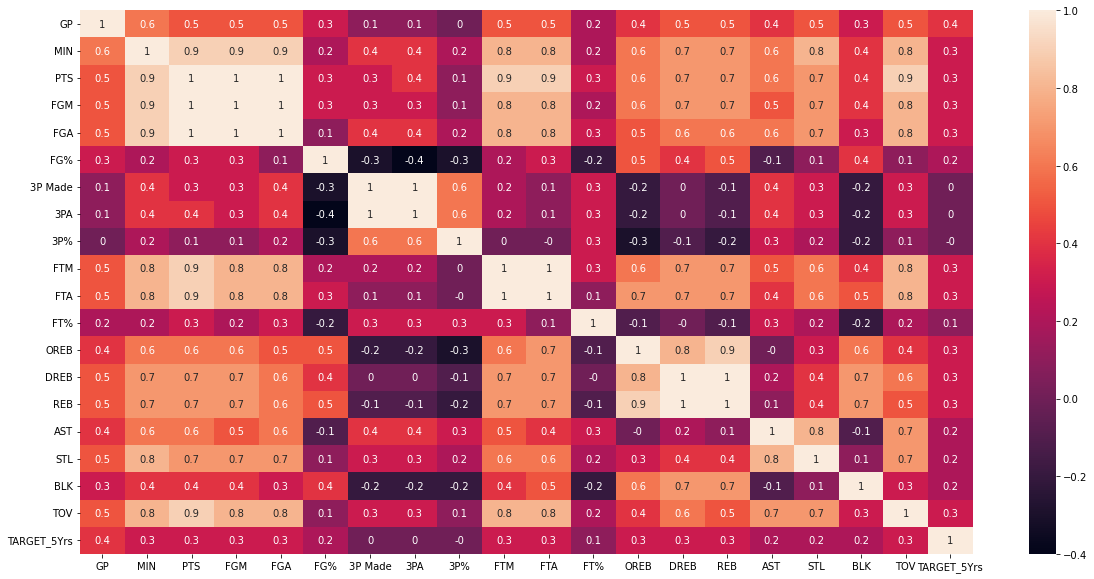

In [14]:
plt.figure(figsize=(20,10))
sns.heatmap(nba.corr().round(1),annot=True) # changing color 

<AxesSubplot:>

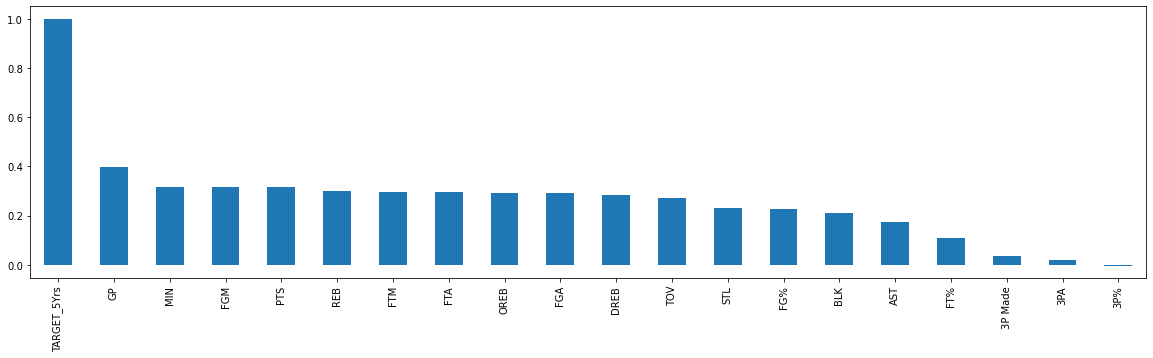

In [15]:
# Showing the correlation plot for correlation of Target with each of the remaining features
plt.figure(figsize=(16,10))
corr = nba.corr()['TARGET_5Yrs']  #
corr.sort_values(ascending=False).plot(kind='bar', figsize=(20,5))

In [16]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()

In [17]:
nba[nba.select_dtypes(include = ['object']).columns] = nba[nba.select_dtypes(include = ['object']).columns].apply(le.fit_transform)
# to converting non-numeric data into numeric form

In [18]:
nba.info()
# to check object converted into int

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         1340 non-null   int32  
 1   GP           1340 non-null   int64  
 2   MIN          1340 non-null   float64
 3   PTS          1340 non-null   float64
 4   FGM          1340 non-null   float64
 5   FGA          1340 non-null   float64
 6   FG%          1340 non-null   float64
 7   3P Made      1340 non-null   float64
 8   3PA          1340 non-null   float64
 9   3P%          1340 non-null   float64
 10  FTM          1340 non-null   float64
 11  FTA          1340 non-null   float64
 12  FT%          1340 non-null   float64
 13  OREB         1340 non-null   float64
 14  DREB         1340 non-null   float64
 15  REB          1340 non-null   float64
 16  AST          1340 non-null   float64
 17  STL          1340 non-null   float64
 18  BLK          1340 non-null   float64
 19  TOV   

<AxesSubplot:xlabel='TARGET_5Yrs', ylabel='count'>

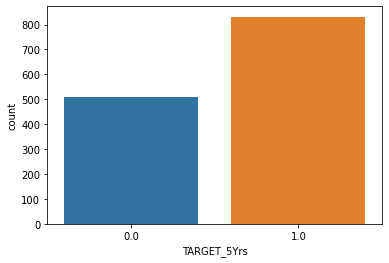

In [19]:
sns.countplot(x='TARGET_5Yrs' ,data = nba )
# to show counts using the graphical method

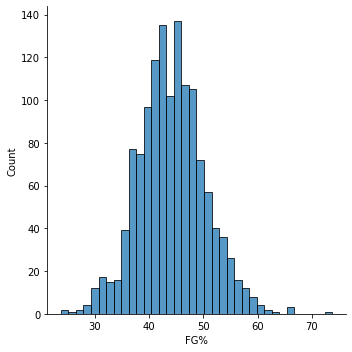

In [20]:
sns.displot(nba['FG%'])

C:\Users\owner\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='FG%'>

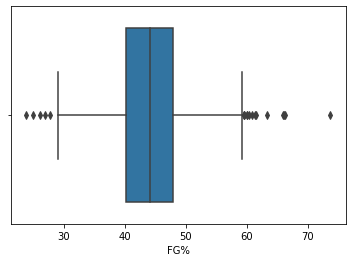

In [21]:
sns.boxplot(nba['FG%'])

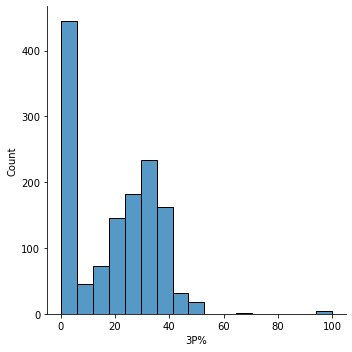

In [22]:
sns.displot(nba['3P%'])

C:\Users\owner\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='3P%'>

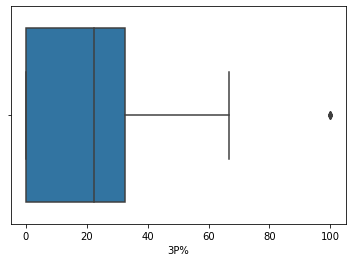

In [23]:
sns.boxplot(nba['3P%'])

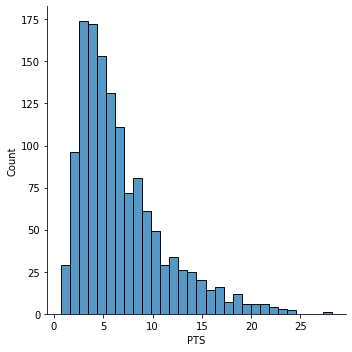

In [24]:
sns.displot(nba.PTS)

C:\Users\owner\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='PTS'>

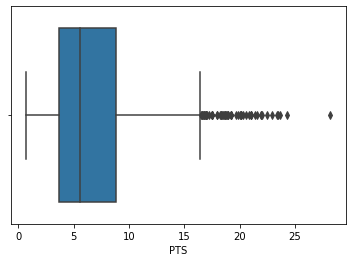

In [25]:
sns.boxplot(nba.PTS)

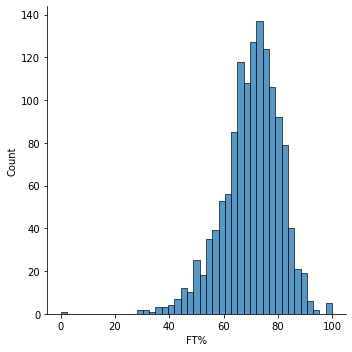

In [26]:
sns.displot(nba['FT%'])

C:\Users\owner\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='FT%'>

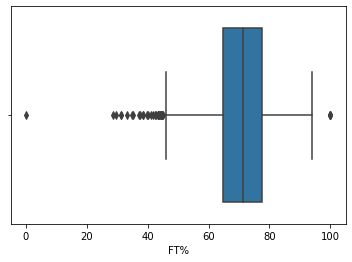

In [27]:
sns.boxplot(nba['FT%'])

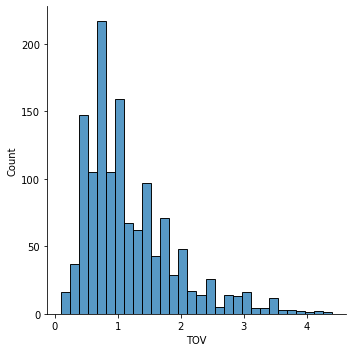

In [28]:
sns.displot(nba.TOV)

C:\Users\owner\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='TOV'>

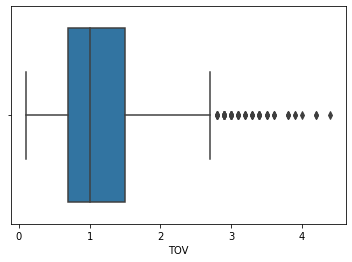

In [29]:
sns.boxplot(nba.TOV)

<AxesSubplot:>

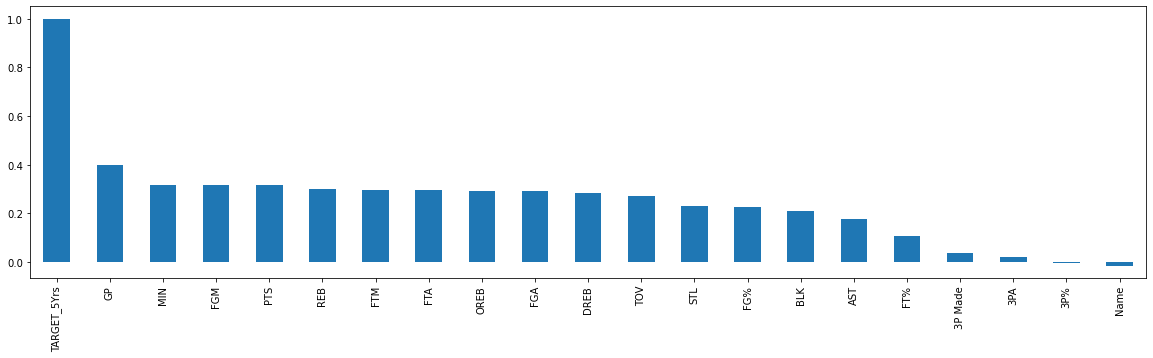

In [30]:

plt.figure(figsize=(16,10))
corr = nba.corr()['TARGET_5Yrs']  #
corr.sort_values(ascending=False).plot(kind='bar', figsize=(20,5))

In [31]:
nba = nba.iloc[:, [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]]

# SAMPLING

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
train, test= train_test_split(nba, test_size=0.2 , random_state=42)

In [34]:
train.shape

(1072, 20)

In [35]:
test.shape

(268, 20)

df3=train[train.TARGET_5Yrs==1]
df2=train[train.TARGET_5Yrs==0]

train=pd.concat([train,df2])

In [36]:
train.shape

(1072, 20)

In [37]:
train_x = train.iloc[:,0:-1 ]
train_y = train.iloc[:, -1]

test_x = test.iloc[:, 0:-1]
test_y = test.iloc[:, -1]

# Build the model

# LOGISTIC REGRESSION

In [38]:
from sklearn.linear_model import LogisticRegression

In [39]:
log = LogisticRegression(penalty='l2')

In [40]:
log.fit(train_x, train_y)

C:\Users\owner\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [41]:
pred =log.predict(test_x)

In [42]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

In [43]:
log_cf = confusion_matrix(test_y, pred)
log_accuracy= accuracy_score(test_y, pred)
log_recall = recall_score(test_y, pred)
log_precision = precision_score(test_y,pred)
log_f1 = f1_score(test_y, pred)

In [44]:
log_cf 

array([[ 54,  45],
       [ 26, 143]], dtype=int64)

In [45]:
print(log_accuracy)
print(log_recall)
print(log_precision)
print(log_f1)

0.7350746268656716
0.8461538461538461
0.7606382978723404
0.8011204481792716


# RANDOM FOREST

In [46]:
from sklearn.ensemble import RandomForestClassifier

In [47]:
rf = RandomForestClassifier(n_estimators=75,criterion='entropy')

In [48]:
rf.fit(train_x, train_y)

RandomForestClassifier(criterion='entropy', n_estimators=75)

In [49]:
nba1 = nba.iloc[:, [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18]]

In [50]:
a =list(rf.feature_importances_)
b= list(nba1.columns)

In [51]:
df = pd.DataFrame()

In [52]:
df['FEATURES NAME'] = b
df['FEATURES VALUES'] = a

In [53]:
df

,FEATURES NAME,FEATURES VALUES
0,GP,0.099912
1,MIN,0.063068
2,PTS,0.063421
3,FGM,0.062801
4,FGA,0.051888
5,FG%,0.074310
6,3P Made,0.021248
7,3PA,0.039116
8,3P%,0.046654
9,FTM,0.048579


In [54]:
pred_rf = rf.predict(test_x)

In [55]:
rf_cf = confusion_matrix(test_y, pred_rf)
rf_accuracy= accuracy_score(test_y, pred_rf)
rf_recall = recall_score(test_y, pred_rf)
rf_precision = precision_score(test_y,pred_rf)
rf_f1 = f1_score(test_y, pred_rf)

In [57]:
print(rf_accuracy)
print(rf_recall)
print(rf_precision)
print(rf_f1)

0.7052238805970149
0.834319526627219
0.734375
0.7811634349030471


# KNN

In [58]:
from sklearn.neighbors import KNeighborsClassifier

In [59]:
knn = KNeighborsClassifier(n_neighbors=7)

In [60]:
knn.fit(train_x, train_y)

KNeighborsClassifier(n_neighbors=7)

In [61]:
pred_knn = knn.predict(test_x)

In [62]:
knn_cf = confusion_matrix(test_y, pred_knn)
knn_accuracy= accuracy_score(test_y, pred_knn)
knn_recall = recall_score(test_y, pred_knn)
knn_precision = precision_score(test_y,pred_knn)
knn_f1 = f1_score(test_y, pred_knn)

In [63]:
knn_cf

array([[ 46,  53],
       [ 31, 138]], dtype=int64)

In [64]:
print(knn_accuracy)
print(knn_recall)
print(knn_precision)
print(knn_f1)

0.6865671641791045
0.8165680473372781
0.7225130890052356
0.7666666666666666


# SVM

In [65]:
from sklearn.svm import SVC

In [66]:
svc = SVC(kernel='rbf',degree=4)

In [67]:
svc.fit(train_x , train_y)

SVC(degree=4)

In [68]:
pred_svm=svc.predict(test_x)

In [69]:
svm_cf = confusion_matrix(test_y, pred_svm)
svm_accuracy= accuracy_score(test_y, pred_svm)
svm_recall = recall_score(test_y, pred_svm)
svm_precision = precision_score(test_y,pred_svm)
svm_f1 = f1_score(test_y, pred_svm)

In [70]:
svm_cf

array([[ 42,  57],
       [ 18, 151]], dtype=int64)

In [71]:
print(svm_accuracy)
print(svm_recall)
print(svm_precision)
print(svm_f1)

0.7201492537313433
0.893491124260355
0.7259615384615384
0.8010610079575597


In [72]:
# I conclude Logistics Regression model gives the best results. 